# Does a new ad on the webpage drive more success for both the company and customers?
In the Online Education Website, they made the second change that is a more career focused description(ad) on a course overview page in the hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following **metrics**: 

1. **Enrollment Rate:** Click through rate for the Enroll button the course overview page
2. **Average Reading Duration:** Average number of seconds spent on the course overview page
3. **Average Classroom Time:** Average number of days spent in the classroom for students enrolled in the course
4. **Completion Rate:** Course completion rate for students enrolled in the course

First, let's determine if the difference observed for each metric is statistically significant individually.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

### Metric 1. Enrollment Rate

In [2]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [ ]:
df.info()

In [ ]:
df.action.unique()

In [3]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [4]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [5]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [6]:
# Create a sampling distribution of the difference in proportions with bootstrapping
diffs = []
for i in range(10000):
    b_samp = df.sample(df.shape[0], replace =True)
    ctrl_df = b_samp.query('group == "control"')
    exp_df = b_samp.query('group == "experiment"')
    ctrl_ctr = ctrl_df.query('action == "enroll"').id.nunique() / ctrl_df.query('action == "view"').id.nunique()
    exp_ctr = exp_df.query('action == "enroll"').id.nunique() / exp_df.query('action == "view"').id.nunique()
    diffs.append(exp_ctr - ctrl_ctr)

(array([   11.,    80.,   520.,  1702.,  3145.,  2744.,  1368.,   367.,
           57.,     6.]),
 array([-0.02943202, -0.01728909, -0.00514617,  0.00699675,  0.01913967,
         0.03128259,  0.04342551,  0.05556843,  0.06771136,  0.07985428,
         0.0919972 ]),
 <a list of 10 Patch objects>)

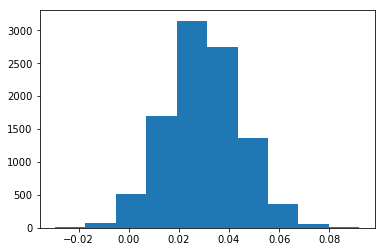

In [7]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

In [8]:
diffs.shape, diffs.size, diffs.mean(), diffs.std()


((10000,), 10000, 0.02986836562405594, 0.014890736730544262)

(array([   10.,    88.,   485.,  1605.,  2831.,  2844.,  1543.,   498.,
           88.,     8.]),
 array([ -5.84074295e-02,  -4.67202293e-02,  -3.50330292e-02,
         -2.33458290e-02,  -1.16586289e-02,   2.85712647e-05,
          1.17157714e-02,   2.34029716e-02,   3.50901717e-02,
          4.67773719e-02,   5.84645720e-02]),
 <a list of 10 Patch objects>)

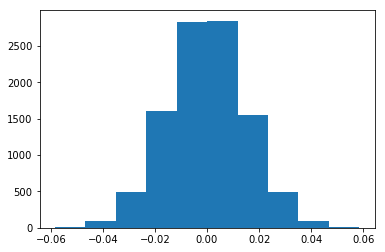

In [9]:
# Simulate distribution under the null hypothesis
# why.. diffs.std() != np.std(diffs) ??????????????
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals)

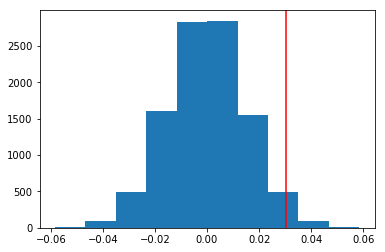

In [10]:
# Plot observed statistic with the null distibution
plt.hist(null_vals)
plt.axvline(obs_diff, c='red')

In [11]:
# Compute p-value
(null_vals > obs_diff).mean()

#the difference is significant! the possibility of the No difference is 0.022.. 
# With a type I error rate of 0.05, we have evidence that the enrollment rate for this course increases when using the 
#experimental description on its overview page? YES. 

0.021600000000000001

### Metric 2. Average Reading Duration

In [12]:
# compute average reading durations for each group
control_mean = df.query('group == "control"').duration.mean()
experiment_mean = df.query('group == "experiment"').duration.mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [13]:
# compute observed difference in means
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574393

In [14]:
# simulate sampling distribution for the difference in means
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"').duration.mean()
    experiment_mean = b_samp.query('group == "experiment"').duration.mean()
    diffs.append(experiment_mean - control_mean)

In [15]:
# convert to numpy array
diffs = np.array(diffs)

In [ ]:
# plot sampling distribution
plt.hist(diffs);

In [16]:
# simulate the distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

In [ ]:
# plot null distribution
plt.hist(null_vals);

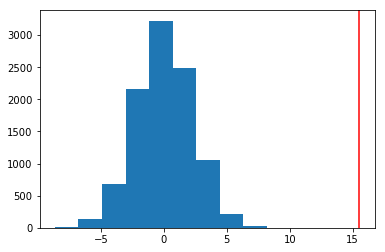

In [17]:
# plot null distribution and where our observed statistic falls
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [18]:
# compute p-value
(null_vals > obs_diff).mean()

# the difference is very significant. 

0.0

### Metric 3. Average Classroom Time

In [19]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [ ]:
df.info()

In [20]:
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [21]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [22]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_mean = b_samp.query('group == "control"').total_days.mean()
    experiment_mean = b_samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

In [23]:
# convert to numpy array
diffs = np.array(diffs)

In [ ]:
# plot sampling distribution
plt.hist(diffs);

In [24]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

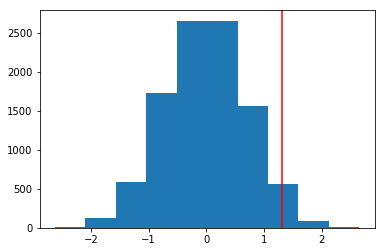

In [25]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [26]:
# compute p value
(null_vals > obs_diff).mean()

# we have evidence that users spend more time in the classroom after seeing the experimental description in the course overview 
#page...YES. 

# But Even if the increase in classroom time is statistically significant, engaging students for 1.3 more days in the classroom,
#when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical
#perspective for the company....

0.032199999999999999

### Metric 4. Completion Rate

In [27]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_ctr = control_df.query('completed == True').id.nunique() / control_df.id.nunique()

# Display completion rate
control_ctr

0.3719951923076923

In [28]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df.query('completed == True').id.nunique() / experiment_df.id.nunique()

# Display completion rate
experiment_ctr

0.3935334872979215

In [29]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [30]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('completed == True').id.nunique() / control_df.id.nunique()
    experiment_ctr = experiment_df.query('completed == True').id.nunique() / experiment_df.id.nunique()
    diffs.append(experiment_ctr - control_ctr)

In [31]:
# convert to numpy array
diffs = np.array(diffs)

In [ ]:
# plot distribution
plt.hist(diffs);

In [32]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

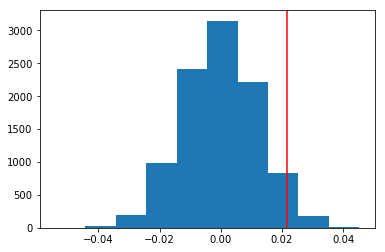

In [33]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [34]:
# compute p value
(null_vals > obs_diff).mean()

# We have evidence that this course increases in completion rate when using the experimental description on its course overview 
#page..

0.038699999999999998

## Analyzing Multiple Metrics

The more metrics you evaluate, the more likely you are to observe significant differences just by chance - similar to what you saw in previous lessons with multiple tests. Luckily, this multiple comparisons problem can be handled in several ways. The probability of any `false Positive` (alpha) increases as we increase the number of metrics - Bonferroni Correction. 

### Here are the p-values computed for the four metrics in this experiment

- 1.Enrollment Rate: 0.0159
- 2.Average Reading Duration: 0
- 3.Average Classroom Time: 0.0384
- 4.Completion Rate: 0.0363

If our original alpha value was 0.05, Bonferroni corrected alpha value is 0.0125. so.. With the Bonferroni corrected alpha value, statistically significant metrics are...only Average Reading Duration...well..Bonferroni value seems overly conservative in this case. 

Since the Bonferroni method is too conservative when we expect correlation among metrics, we can better approach this problem with more sophisticated methods, such as:
- the closed testing procedure
- Boole-Bonferroni bound
- the Holm-Bonferroni method

These are less conservative and take this correlation into account. If you do choose to use a less conservative method, just make sure the assumptions of that method are truly met in your situation, and that you're not just trying to cheat on a p-value. Choosing a poorly suited test just to get significant results will only lead to misguided decisions that harm your company's performance in the long run.

### REALITY: 
What they don't know, is that although the enrollment rate appears to increase with the new description, the results from this A/B test are unreliable and largely due to chance, because fewer than 40 out of thousands of visitors enrolled during this experiment. This makes even one new student for the course substantially impact the results and potentially even the conclusion.

In this case, we needed to have more time and traffic to the page to see if the change had a significant impact.

When designing an A/B test and drawing conclusions based on its results, there are some common ones to consider.
- Novelty effect and change aversion when existing users first experience a change
- Sufficient traffic and conversions to have significant and repeatable results
- Best metric choice for making the ultimate decision (eg. measuring revenue vs. clicks)
- Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events.
- Practical significance of a conversion rate (the cost of launching a new feature vs. the gain from the increase in conversion)
- Consistency among test subjects in the control and experiment group (imbalance in the population represented in each group can lead to situations like Simpson's Paradox)


